# Import Libraries


In [72]:
import os
import urllib

# Numpy and Pandas libraries for storing and manipulating data
import numpy as np
import pandas as pd

# Seaborn and Matplotlib for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-Learn Descision Tree, Logistic Regression and helper function
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import train_test_split

RANDOM_SEED = 10

In [76]:
# Load the data
draft_data = pd.read_csv(r"C:\Users\jason\Downloads\archive\nfl_combine_2010_to_2023.csv")

draft_data

,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Round,Pick
0,2010,Seyi Ajirotutu,WR,Fresno State,6-3,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,NaN,NaN
1,2010,Rahim Alem,DE,LSU,6-3,251.0,4.75,30.5,NaN,106.0,7.54,4.80,False,NaN,NaN
2,2010,Charles Alexander,DT,LSU,6-4,300.0,5.40,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,2010,Danario Alexander,WR,Missouri,6-5,215.0,4.62,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,2010,Nate Allen,S,South Florida,6-0,207.0,4.50,NaN,16.0,NaN,NaN,NaN,True,2.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,Luke Wypler,C,Ohio St.,6-3,303.0,5.14,30.5,NaN,106.0,7.64,4.53,True,6.0,190.0
4737,2023,Bryce Young,QB,Alabama,5-10,204.0,NaN,NaN,NaN,NaN,NaN,NaN,True,1.0,1.0
4738,2023,Byron Young,DT,Alabama,6-3,294.0,NaN,26.0,24.0,108.0,7.68,NaN,True,3.0,70.0
4739,2023,Byron Young,EDGE,Tennessee,6-2,250.0,4.43,38.0,22.0,132.0,7.19,NaN,True,3.0,77.0


In [77]:
# Reformat Height Data
def height_to_inches(height):
    if pd.notna(height):
        feet, inches = height.split("-")
        return int(feet) * 12 + int(inches)
    else:
        return None

draft_data["Height"] = draft_data["Height"].apply(height_to_inches)
draft_data["Weight"] = draft_data['Weight'].fillna(0)
draft_data["40yd"] = draft_data['40yd'].fillna(0)
draft_data["Vertical"] = draft_data['Vertical'].fillna(0)
draft_data["Bench"] = draft_data['Bench'].fillna(0)
draft_data["Broad Jump"] = draft_data['Broad Jump'].fillna(0)
draft_data["3Cone"] = draft_data['3Cone'].fillna(0)
draft_data["Shuttle"] = draft_data['Shuttle'].fillna(0)


In [78]:
draft_data

,Year,Player,Pos,School,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Drafted,Round,Pick
0,2010,Seyi Ajirotutu,WR,Fresno State,75.0,204.0,4.60,36.0,14.0,115.0,7.22,4.39,False,NaN,NaN
1,2010,Rahim Alem,DE,LSU,75.0,251.0,4.75,30.5,0.0,106.0,7.54,4.80,False,NaN,NaN
2,2010,Charles Alexander,DT,LSU,76.0,300.0,5.40,0.0,0.0,0.0,0.00,0.00,False,NaN,NaN
3,2010,Danario Alexander,WR,Missouri,77.0,215.0,4.62,0.0,0.0,0.0,0.00,0.00,False,NaN,NaN
4,2010,Nate Allen,S,South Florida,72.0,207.0,4.50,0.0,16.0,0.0,0.00,0.00,True,2.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4736,2023,Luke Wypler,C,Ohio St.,75.0,303.0,5.14,30.5,0.0,106.0,7.64,4.53,True,6.0,190.0
4737,2023,Bryce Young,QB,Alabama,70.0,204.0,0.00,0.0,0.0,0.0,0.00,0.00,True,1.0,1.0
4738,2023,Byron Young,DT,Alabama,75.0,294.0,0.00,26.0,24.0,108.0,7.68,0.00,True,3.0,70.0
4739,2023,Byron Young,EDGE,Tennessee,74.0,250.0,4.43,38.0,22.0,132.0,7.19,0.00,True,3.0,77.0


In [79]:
draft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4741 entries, 0 to 4740
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        4741 non-null   int64  
 1   Player      4741 non-null   object 
 2   Pos         4741 non-null   object 
 3   School      4741 non-null   object 
 4   Height      4712 non-null   float64
 5   Weight      4741 non-null   float64
 6   40yd        4741 non-null   float64
 7   Vertical    4741 non-null   float64
 8   Bench       4741 non-null   float64
 9   Broad Jump  4741 non-null   float64
 10  3Cone       4741 non-null   float64
 11  Shuttle     4741 non-null   float64
 12  Drafted     4741 non-null   bool   
 13  Round       3008 non-null   float64
 14  Pick        3008 non-null   float64
dtypes: bool(1), float64(10), int64(1), object(3)
memory usage: 523.3+ KB


In [80]:
draft_data.describe()

,Year,Height,Weight,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,Round,Pick
count,4741.000000,4712.000000,4741.000000,4741.000000,4741.000000,4741.000000,4741.000000,4741.000000,4741.000000,3008.000000,3008.000000
mean,2016.626661,73.818548,240.460451,4.211753,25.912213,13.485552,89.708078,4.273761,2.709521,3.840093,115.872340
std,4.028045,2.682675,48.410603,1.547336,13.989962,10.868278,49.122043,3.581542,2.160264,1.915932,70.726114
min,2010.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2013.000000,72.000000,204.000000,4.480000,25.500000,0.000000,97.000000,0.000000,0.000000,2.000000,55.000000
50%,2017.000000,74.000000,231.000000,4.630000,31.500000,15.000000,113.000000,6.880000,4.180000,4.000000,111.000000
75%,2020.000000,76.000000,276.000000,4.910000,35.000000,22.000000,121.000000,7.230000,4.430000,5.000000,172.000000
max,2023.000000,82.000000,384.000000,6.000000,46.500000,49.000000,147.000000,9.040000,5.560000,7.000000,262.000000


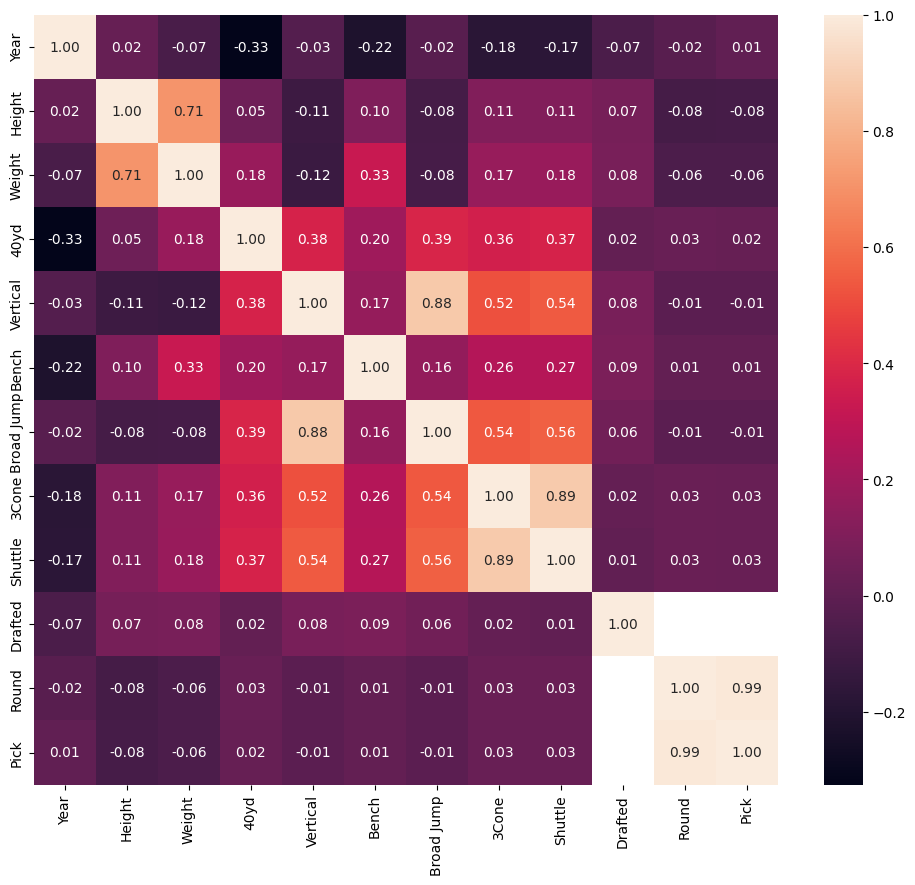

In [81]:
# adjust the size of the figure
plt.figure(figsize=(12,10))

# pass the correlation table into seaborn heatmap
# set annotation to be 2 floating point precisions
sns.heatmap(draft_data.corr(numeric_only = True), annot=True, fmt='.2f')
plt.show()

In [82]:
# select a set of feature columns as X and select the "type" column as y
selected_features = ['Weight', '40yd', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle']
X = draft_data[selected_features]
y = draft_data['Drafted']
# we will set aside 20% of the training data as validation data
test_ratio = 0.2
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_ratio,
                                                      random_state=RANDOM_SEED)


In [83]:
# initialize Decision Tree classifier with max tree depth of 5
classifier = tree.DecisionTreeClassifier(max_depth=4)

# Train the Decision Tree classifier with the training data
classifier = classifier.fit(X_train, y_train)
# Implement a function that calculates the prediction accuracy.
def calculate_accuracy(pred_labels: np.ndarray, true_labels: np.ndarray):
    accuracy = np.sum(pred_labels==true_labels) / true_labels.__len__() * 100
    return accuracy

pred_train = classifier.predict(X_train)
acc_train = calculate_accuracy(pred_train, y_train)
print(f'Model accuracy on training data set is {acc_train:.2f}%')

pred_valid = classifier.predict(X_valid)
acc_valid = calculate_accuracy(pred_valid, y_valid)
print(f'Model accuracy on validation data set is {acc_valid:.2f}%')

Model accuracy on training data set is 68.38%
Model accuracy on validation data set is 66.39%


In [84]:
# SVM Model
clf = svm.SVC()
clf = clf.fit(X_train, y_train)
pred_train_svm = clf.predict(X_train)
acc_train_svm = calculate_accuracy(pred_train_svm, y_train)
print(f'Model accuracy on training data set is {acc_train_svm:.2f}%')

pred_valid_svm = clf.predict(X_valid)
acc_valid_svm = calculate_accuracy(pred_valid_svm, y_valid)
print(f'Model accuracy on validation data set is {acc_valid_svm:.2f}%')

Model accuracy on training data set is 63.42%
Model accuracy on validation data set is 63.54%
